In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

../../data/data_out/biking_mixed_128_test_1_out_concatenate_chirps_and_doppler.txt
(581, 321)


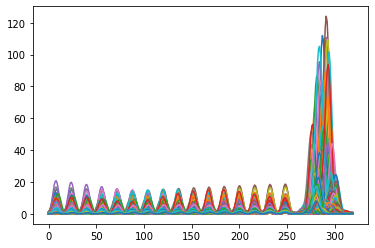

../../data/data_out/walking_mixed_128_test_1_out_concatenate_chirps_and_doppler.txt
(467, 321)


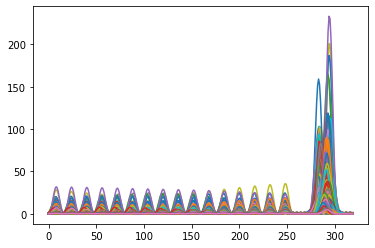

35.780140821833264
0.0004128493710786
233.01148081170948
0.0004128493710786
28.30426256688326
0.7808754572036152


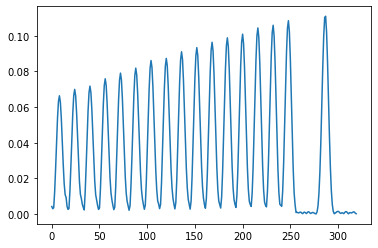

In [3]:
directory = os.fsencode('../../data/data_out/')
range_num = 256
dopp_num = 64
X = np.zeros((1,range_num+dopp_num+1))
y = np.empty(1)
i = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename != 'No_target_out.txt' and filename.endswith('1_out_concatenate_chirps_and_doppler.txt'):
        path = os.path.join(os.fsdecode(directory), filename)
        print(path)                    
        data = pd.read_csv(path, sep='\t', header=None)
        print(data.values[:,:].shape)
        X = np.append(X,data.values[:,:], axis=0)
        y = np.append(y,i + np.zeros((data.shape[0],1)))
        i += 1
        plt.plot(data.values[:,:-1].T)
        plt.show()
X = X[1:,:]#/max(np.amax(dataset, axis = 0))
y = y[1:]

### Normalization

#range
range_max = np.max(X[:,:range_num])
range_min = np.min(X[:,:range_num])
print(range_max)
print(range_min)
X[:,:range_num] = (X[:,:range_num] - range_min)/(range_max - range_min)

#doppler
dopp_max = np.max(X[:,range_num:-1])
dopp_min = np.min(X[:,range_num:-1])
print(dopp_max)
print(range_min)
X[:,range_num:-1] = (X[:,range_num:-1] - dopp_min)/(dopp_max - dopp_min)

plt.plot(X[0,:-1])

#distance
dist_max = np.max(X[:,-1])
dist_min = np.min(X[:,-1])
print(dist_max)
print(dist_min)
X[:,-1] = (X[:,-1] -dist_min)/(dist_max - dist_min)

In [20]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=100)
X_train = X
y_train = y

../data_out/biking_mixed_128_test_2_out_concatenate_chirps_and_doppler.txt
(456, 321)


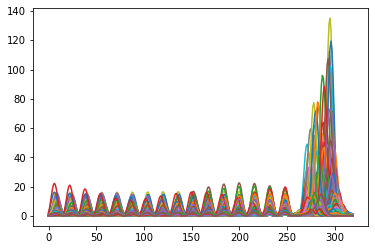

../data_out/walking_mixed_128_test_2_out_concatenate_chirps_and_doppler.txt
(519, 321)


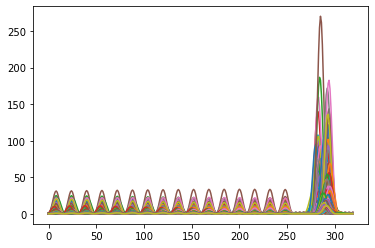

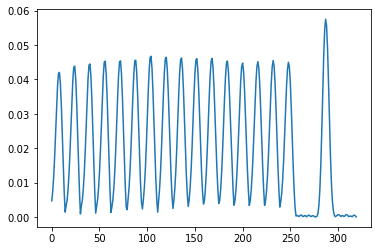

In [22]:
X = np.zeros((1,range_num + dopp_num + 1))
y = np.empty(1)
i = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename != 'No_target_out.txt' and filename.endswith('2_out_concatenate_chirps_and_doppler.txt'):
        path = os.path.join(os.fsdecode(directory), filename)
        print(path)                    
        data = pd.read_csv(path, sep='\t', header=None)
        print(data.values[:,:].shape)
        X = np.append(X,data.values[:,:], axis=0)
        y = np.append(y,i + np.zeros((data.shape[0],1)))
        i += 1
        plt.plot(data.values[:,:-1].T)
        plt.show()
X = X[1:,:]#/max(np.amax(dataset, axis = 0))
y = y[1:]

### Normalization

#range
X[:,:range_num] = (X[:,:range_num] - range_min)/(range_max - range_min)

#doppler
X[:,range_num:-1] = (X[:,range_num:-1] - dopp_min)/(dopp_max - dopp_min)

plt.plot(X[0,:-1])

#distance

X[:,-1] = (X[:,-1] -dist_min)/(dist_max - dist_min)

In [23]:
X_test = X
y_test = y

In [24]:
svc = SVC(random_state=0)

param_grid = [{'kernel': ['rbf'], 'gamma': [1, 1e-1, 1e-2, 1e-3],
                     'C': [1, 10, 100, 1000, 10000]}]

search = GridSearchCV(
    estimator=svc, param_grid=param_grid,
    scoring='accuracy'
)
search.fit(X_train, y_train)
print("Best parameters set found on development set:")
print(search.best_params_)
y_pred = search.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Best parameters set found on development set:
{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy: 0.8574358974358974


In [25]:
from sklearn import linear_model
reg = linear_model.RidgeClassifierCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)
print(reg.alpha_)
y_pred = reg.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

0.01
Accuracy: 0.8102564102564103


In [26]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "objective": ["binary:logistic"]
     }
    

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="accuracy",
                    cv=5)

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

C:\Users\COPPOLR\Desktop\SVM-classification\env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 87.08%


In [27]:
grid.best_params_

{'eta': 0.25, 'gamma': 0.2, 'max_depth': 4, 'objective': 'binary:logistic'}

In [28]:
y_pred = grid.predict(X_test)

In [29]:
y_pred.shape

(975,)

In [30]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))

Accuracy: 0.8707692307692307


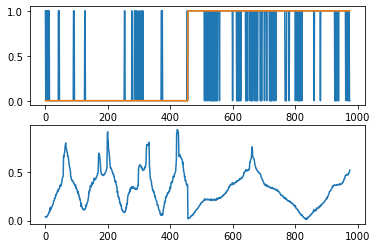

In [31]:
chirps = y_pred.shape[0]
fig, ax = plt.subplots(2,1)
ax[0].plot(y_pred[:chirps])
ax[0].plot(y_test[:chirps])
ax[1].plot(X[:chirps,-1].T)

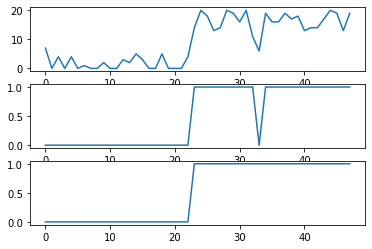

In [32]:
consec_frames = 20
total_frames = X.shape[0]//consec_frames
accuracy = 0

frame_prediction_array = np.zeros(total_frames)
frame_truth = np.zeros(total_frames)

for i in range(total_frames):
    
    frame_pred = np.sum(search.predict(X[i*consec_frames:(i+1)*consec_frames,:]))
    answer = 0
    if(frame_pred > consec_frames//2):
        answer = 1
    frame_prediction_array[i] = frame_pred
    frame_truth[i] = y[i*consec_frames]

    
fig, ax = plt.subplots(3,1)
ax[0].plot(frame_prediction_array)
ax[1].plot(np.round(frame_prediction_array/consec_frames))
ax[2].plot(frame_truth)
